Dataset Overview:
Number of records: 394
Number of features (excluding target): 13

Columns and Data Types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Descriptive Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   

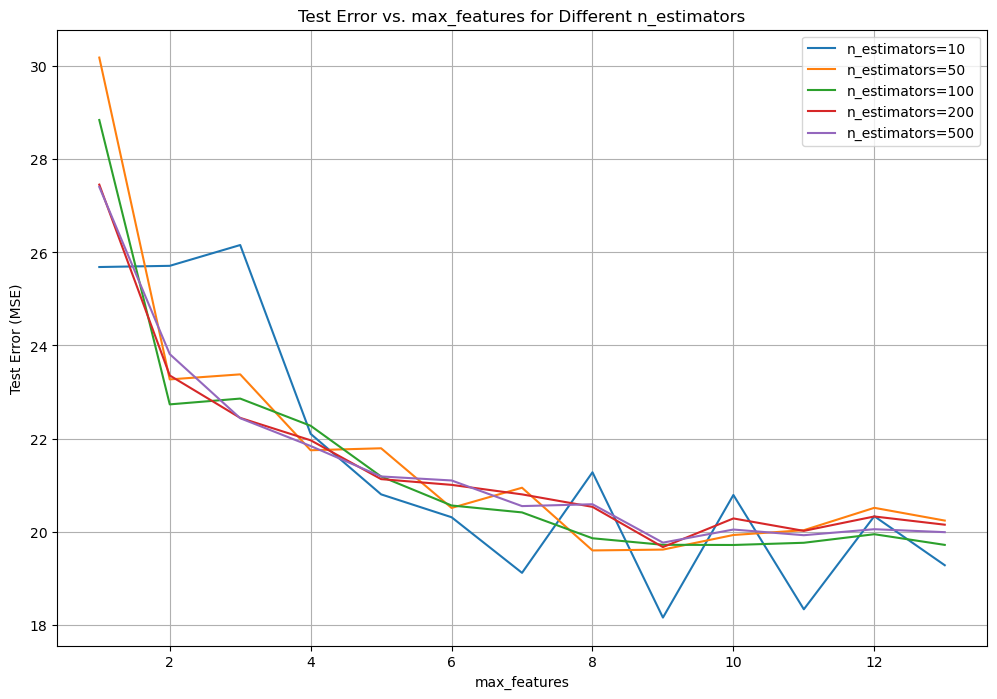

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Arman/Downloads/BostonHousingData.csv'
boston_data = pd.read_csv('C:/Users/Arman/Downloads/BostonHousingData.csv')

# Handle missing values (if necessary)
boston_data_cleaned = boston_data.dropna()

# Dataset overview
print("Dataset Overview:")
print(f"Number of records: {boston_data_cleaned.shape[0]}")
print(f"Number of features (excluding target): {boston_data_cleaned.shape[1] - 1}")
print("\nColumns and Data Types:")
print(boston_data_cleaned.dtypes)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(boston_data_cleaned.describe())

# Check for missing values
missing_values = boston_data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])

# Data type classification
categorical_features = boston_data_cleaned.select_dtypes(include=['object']).columns.tolist()
continuous_features = boston_data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nFeature Types:")
print(f"Categorical Features: {categorical_features}")
print(f"Continuous Features: {continuous_features}")

# Separate features (X) and target variable (y)
X = boston_data_cleaned.drop(columns=['MEDV'])
y = boston_data_cleaned['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define range of max_features and n_estimators values to evaluate
max_features_values = range(1, X_train.shape[1] + 1)
n_estimators_values = [10, 50, 100, 200, 500]

# Store test errors for each combination of max_features and n_estimators
test_errors = np.zeros((len(max_features_values), len(n_estimators_values)))

# Train and evaluate Random Forest models
for i, max_features in enumerate(max_features_values):
    for j, n_estimators in enumerate(n_estimators_values):
        rf = RandomForestRegressor(max_features=max_features, n_estimators=n_estimators, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        test_errors[i, j] = mean_squared_error(y_test, y_pred)

# Plot the test error as a function of max_features and n_estimators
plt.figure(figsize=(12, 8))
for j, n_estimators in enumerate(n_estimators_values):
    plt.plot(max_features_values, test_errors[:, j], label=f'n_estimators={n_estimators}')
plt.xlabel('max_features')
plt.ylabel('Test Error (MSE)')
plt.title('Test Error vs. max_features for Different n_estimators')
plt.legend()
plt.grid(True)
plt.show()


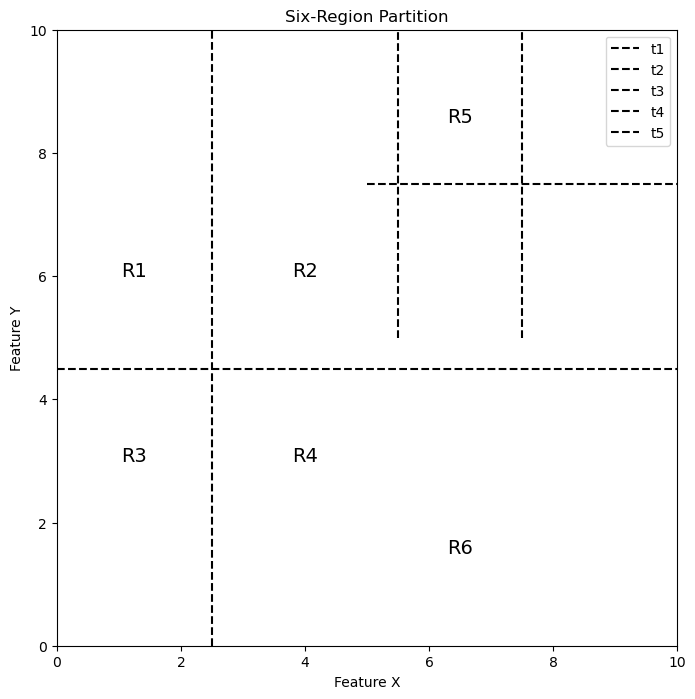

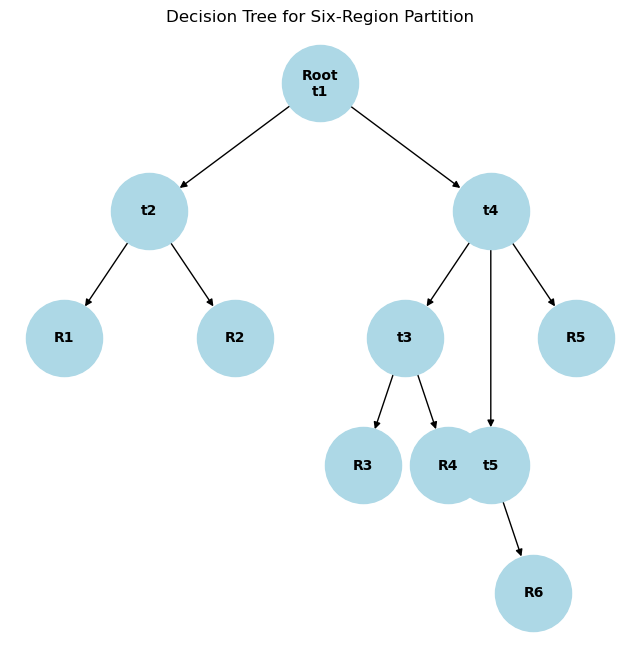

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to create the six-region partition
def plot_six_region_partition():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw partition lines
    ax.axvline(x=2.5, color='black', linestyle='--', label='t1')
    ax.axhline(y=4.5, color='black', linestyle='--', label='t2')
    ax.axhline(y=7.5, xmin=0.5, xmax=1, color='black', linestyle='--', label='t3')
    ax.axvline(x=5.5, ymin=0.5, ymax=1, color='black', linestyle='--', label='t4')
    ax.axvline(x=7.5, ymin=0.5, ymax=1, color='black', linestyle='--', label='t5')

    # Regions
    ax.text(1.25, 6, 'R1', fontsize=14, ha='center')
    ax.text(4, 6, 'R2', fontsize=14, ha='center')
    ax.text(1.25, 3, 'R3', fontsize=14, ha='center')
    ax.text(4, 3, 'R4', fontsize=14, ha='center')
    ax.text(6.5, 8.5, 'R5', fontsize=14, ha='center')
    ax.text(6.5, 1.5, 'R6', fontsize=14, ha='center')

    # Label axes and set limits
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.legend()

    plt.title("Six-Region Partition")
    plt.show()

# Function to create the decision tree for the six-region partition
def plot_six_region_decision_tree():
    G = nx.DiGraph()

    # Add nodes and edges for the decision tree
    G.add_node("Root\nt1", pos=(0, 3))
    G.add_node("t2", pos=(-1, 2))
    G.add_node("t4", pos=(1, 2))
    G.add_node("R1", pos=(-1.5, 1))
    G.add_node("R2", pos=(-0.5, 1))
    G.add_node("t3", pos=(0.5, 1))
    G.add_node("R5", pos=(1.5, 1))
    G.add_node("R3", pos=(0.25, 0))
    G.add_node("R4", pos=(0.75, 0))
    G.add_node("t5", pos=(1, 0))
    G.add_node("R6", pos=(1.25, -1))

    edges = [("Root\nt1", "t2"), ("Root\nt1", "t4"),
             ("t2", "R1"), ("t2", "R2"), 
             ("t4", "t3"), ("t4", "R5"),
             ("t3", "R3"), ("t3", "R4"),
             ("t4", "t5"), ("t5", "R6")]

    G.add_edges_from(edges)

    # Draw the decision tree
    fig, ax = plt.subplots(figsize=(8, 8))
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold', ax=ax)

    plt.title("Decision Tree for Six-Region Partition")
    plt.show()

# Run both functions to display the plots
plot_six_region_partition()
plot_six_region_decision_tree()


decision_tree Accuracy: 0.8468
Submission file created for decision_tree at: C:/Users/arman/Downloads/decision_tree_submission.csv
bagging Accuracy: 0.8885
Submission file created for bagging at: C:/Users/arman/Downloads/bagging_submission.csv
random_forest Accuracy: 0.8955
Submission file created for random_forest at: C:/Users/arman/Downloads/random_forest_submission.csv
boosting Accuracy: 0.9027
Submission file created for boosting at: C:/Users/arman/Downloads/boosting_submission.csv


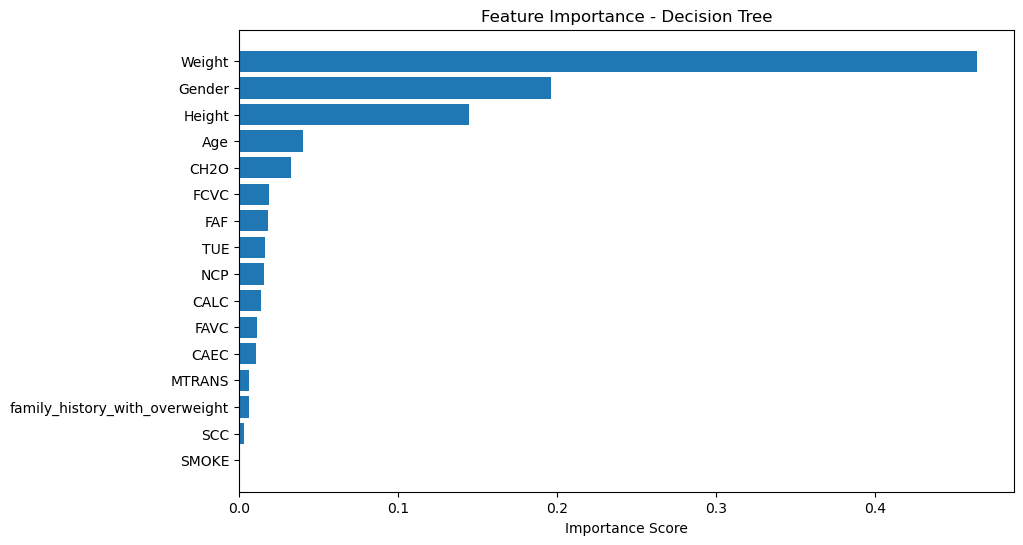

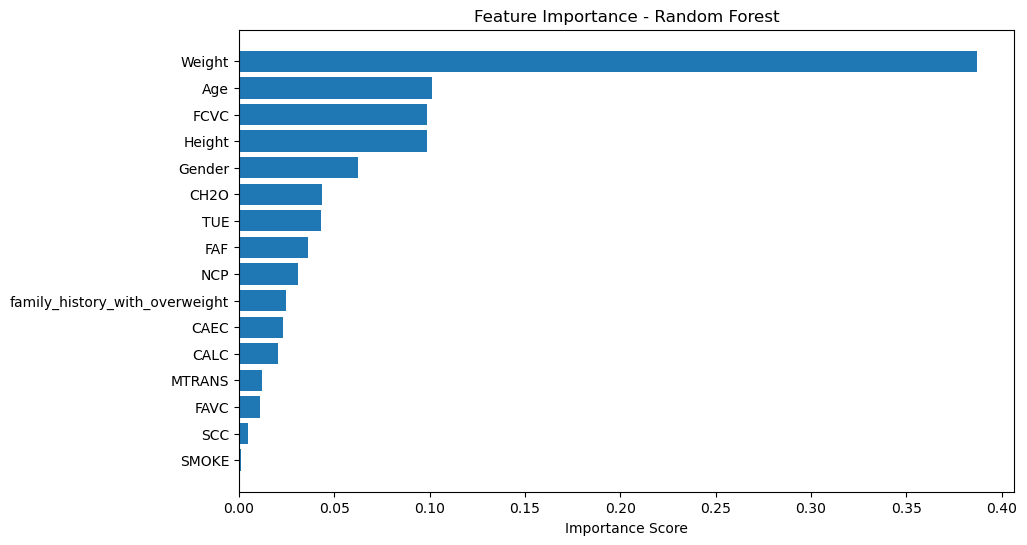

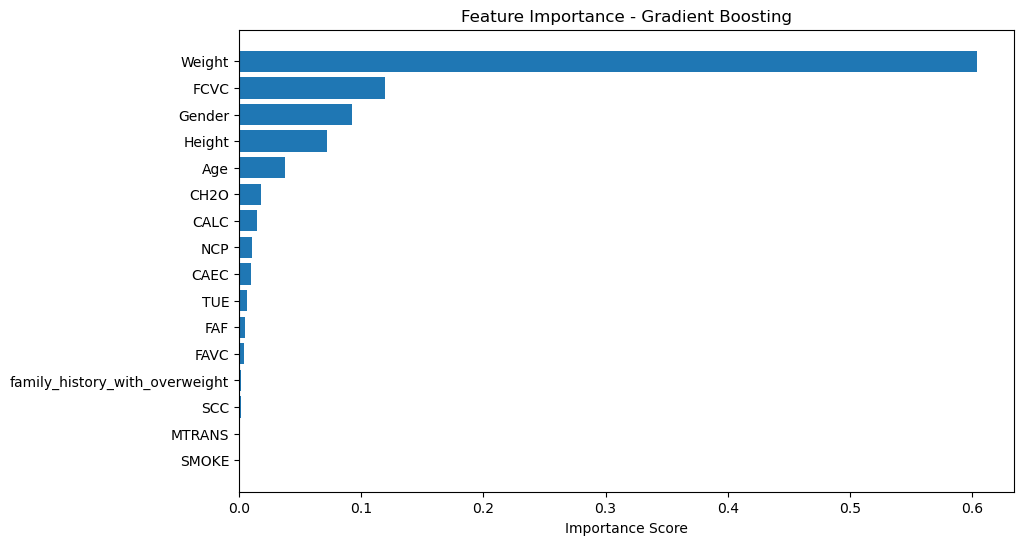

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('C:/Users/arman/Downloads/playground-series-s4e2/train.csv')
test_df = pd.read_csv('C:/Users/arman/Downloads/playground-series-s4e2/test.csv')

# Encode categorical features and target variable
categorical_cols = train_df.select_dtypes(include=['object']).columns.drop('NObeyesdad')
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, le in label_encoders.items():
    train_df[col] = pd.Categorical(train_df[col])
    test_df[col] = pd.Categorical(test_df[col], categories=train_df[col].cat.categories)
    train_df[col] = train_df[col].cat.codes
    test_df[col] = test_df[col].cat.codes

# Encode the target variable
target_encoder = LabelEncoder()
train_df['NObeyesdad'] = target_encoder.fit_transform(train_df['NObeyesdad'])

# Define features and target
X = train_df.drop(columns=['id', 'NObeyesdad'])
y = train_df['NObeyesdad']
X_test = test_df.drop(columns=['id'])

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
decision_tree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
decision_tree.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
boosting_model.fit(X_train, y_train)

# Evaluate models
models = {
    "decision_tree": decision_tree,
    "bagging": bagging_model,
    "random_forest": random_forest,
    "boosting": boosting_model
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_labels = target_encoder.inverse_transform(y_test_pred)  # Convert numeric predictions to original labels
    
    # Prepare and save the submission file
    submission = pd.DataFrame({
        'id': test_df['id'],
        'NObeyesdad': y_test_pred_labels
    })
    submission_filename = f'C:/Users/arman/Downloads/{model_name}_submission.csv'
    submission.to_csv(submission_filename, index=False)
    print(f"Submission file created for {model_name} at: {submission_filename}")


# Plot feature importance
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        sorted_indices = importance.argsort()
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_indices)), importance[sorted_indices], align='center')
        plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Importance Score")
        plt.show()

# Extract feature names
feature_names = X.columns

# Plot feature importance for each model
plot_feature_importance(models["decision_tree"], "Decision Tree", feature_names)
plot_feature_importance(bagging_model.estimator_, "Bagging", feature_names)  # Use `estimator_`
plot_feature_importance(models["random_forest"], "Random Forest", feature_names)
plot_feature_importance(models["boosting"], "Gradient Boosting", feature_names)
